# 

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. Here is a link to a cheat sheet showing the basics of styling text using Markdown.

3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Keep all imports in this cell at the top of your notebook.

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [297]:
gdp_df = pd.read_csv("../data/UNdata_Export_20251011_175347475.csv")

In [298]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [299]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [300]:
gdp_df = gdp_df.drop(columns=["Value Footnotes"])

In [301]:
gdp_df = gdp_df.rename(columns={
    'Country or Area': 'country',
    'Year': 'year',
    'Value': 'GDP_Per_Capita'
})

#renamed columns after removing footnotes

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [302]:
num_rows, num_col = gdp_df.shape
print(f'gdp_df has {num_rows} rows and {num_col}')

gdp_df has 8219 rows and 3


In [303]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8219 non-null   object 
 1   year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [304]:
gdp_df['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990])

In [305]:
gdp_df['year'].nunique()

34

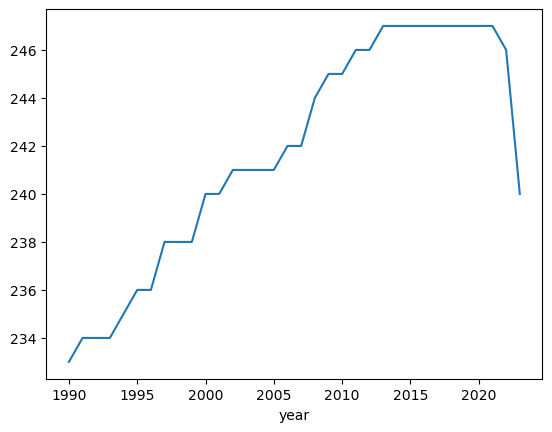

In [306]:
gdp_df['year'].value_counts().sort_index().plot();

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [307]:
num_obs_by_country = gdp_df.groupby("country")["GDP_Per_Capita"].count().sort_values()
num_obs_by_country[num_obs_by_country < 20]

country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Name: GDP_Per_Capita, dtype: int64

In [308]:
gdp_df.head()

,country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [309]:
gdp_df['country'].nunique()

247

In [310]:
gdp_df['country'].value_counts()

country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [311]:
gdp_2021 = gdp_df[gdp_df['year'] == 2021]
gdp_2021.head()

,country,year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [312]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

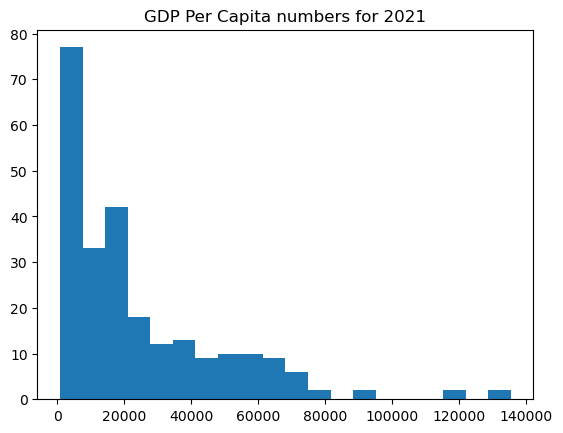

In [313]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins=20 );
plt.title("GDP Per Capita numbers for 2021");

The shape has a tail to the right

12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [314]:
#gdp_2021["GDP_Per_Capita"].sort_values()
#or
gdp_2021.nlargest(5, "GDP_Per_Capita")

,country,year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [315]:
# Correct way to filter for multiple conditions using OR in pandas
gdp_df_filter = gdp_df[(gdp_df['year'] == 1990) | (gdp_df['year'] == 2021)]

# Note: The parentheses around each condition are important to ensure
# the OR operation is applied to the boolean masks, not to the resulting DataFrames

In [316]:
gdp_pivoted = gdp_df_filter.pivot_table(
     index='country',              # Rows
     columns='year',               # Columns
     values='GDP_Per_Capita',      # Values to aggregate               
                      
 ).dropna()

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [317]:
gdp_pivoted

year,1990,2021
country,,
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
Andorra,50036.300776,59332.202910
...,...,...
Vanuatu,3101.680551,3135.836649
Viet Nam,2467.964601,12048.901994
World,11207.386344,19637.823230


In [318]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021] - gdp_pivoted[1990])/gdp_pivoted[1990]

In [319]:
gdp_pivoted

year,1990,2021,Percent_Change
country,,,
Africa Eastern and Southern,3386.854480,3934.287267,16.163458
Africa Western and Central,3299.401375,4698.926894,42.417559
Albania,5327.747458,16113.136519,202.438069
Algeria,11728.545729,14496.865470,23.603265
Andorra,50036.300776,59332.202910,18.578316
...,...,...,...
Vanuatu,3101.680551,3135.836649,1.101213
Viet Nam,2467.964601,12048.901994,388.212108
World,11207.386344,19637.823230,75.222149


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [320]:
n_countries= gdp_pivoted[gdp_pivoted['Percent_Change'] <0]['Percent_Change'].count()
n_countries

np.int64(23)

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2021. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
highest_gdp_percentage = gdp_pivoted['Percent_Change'].idxmax()
highest_gdp_percentage

gdp_pivoted.nlargest(2, "Percent_Change")

year,1990,2021,Percent_Change
country,,,
Equatorial Guinea,1122.817674,16821.448647,1398.146052
China,1645.578944,20406.729658,1140.094237


<Axes: xlabel='year'>

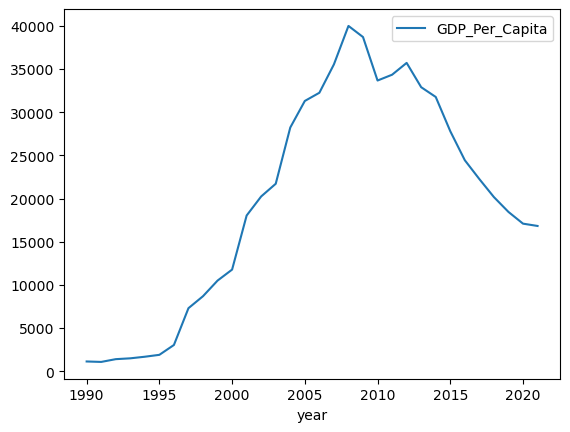

In [323]:
(
    gdp_df
    .loc[(gdp_df['country'] == 'Equatorial Guinea') & 
         (gdp_df['year'] <= 2021) & 
         (gdp_df['year'] >= 1990)]
    .plot(x='year', y='GDP_Per_Capita', kind='line')
)

<Axes: xlabel='year'>

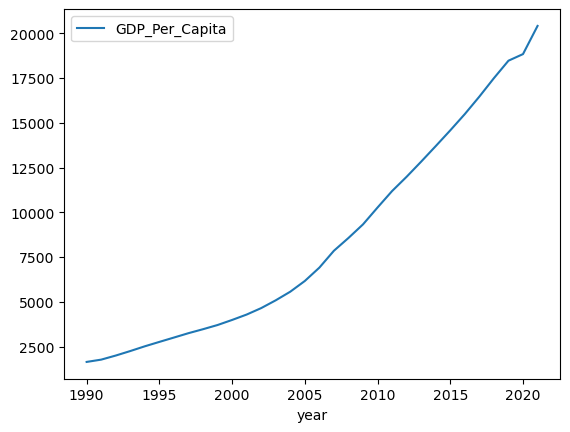

In [324]:
(
    gdp_df
    .loc[(gdp_df['country'] == 'China') & 
         (gdp_df['year'] <= 2021) & 
         (gdp_df['year'] >= 1990)]
    .plot(x='year', y='GDP_Per_Capita', kind='line')
)

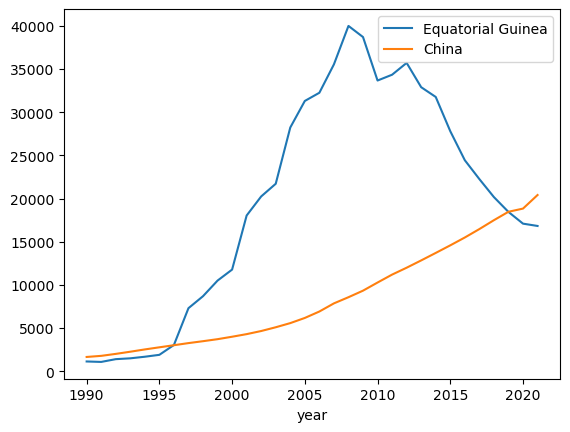

In [325]:
ax=(
gdp_df
.loc[gdp_df['country'] == 'Equatorial Guinea']
.loc[gdp_df['year'] <= 2021]
.loc[gdp_df['year'] >= 1990]
.plot(x="year", y="GDP_Per_Capita", kind="line", label = 'Equatorial Guinea')
)
(
gdp_df
.loc[gdp_df['country'] == 'China']
.loc[gdp_df['year'] <= 2021]
.loc[gdp_df['year'] >= 1990]
.plot(x="year", y="GDP_Per_Capita", kind="line", label = 'China', ax=ax)
);

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [326]:
continents = pd.read_csv("../data/continents.csv")
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [327]:
gdp_df= pd.merge(gdp_df, continents, left_on='country', right_on='Country', how='inner')
gdp_df

,country,year,GDP_Per_Capita,Continent,Country
0,Afghanistan,2023,1992.424394,Asia,Afghanistan
1,Afghanistan,2022,1981.710168,Asia,Afghanistan
2,Afghanistan,2021,2144.166570,Asia,Afghanistan
3,Afghanistan,2020,2769.685745,Asia,Afghanistan
4,Afghanistan,2019,2927.245144,Asia,Afghanistan
...,...,...,...,...,...
6258,Zimbabwe,1994,3965.730986,Africa,Zimbabwe
6259,Zimbabwe,1993,3634.750494,Africa,Zimbabwe
6260,Zimbabwe,1992,3649.891947,Africa,Zimbabwe
6261,Zimbabwe,1991,4126.405247,Africa,Zimbabwe


19. Determine the number of countries per continent. Create a bar chart showing this.

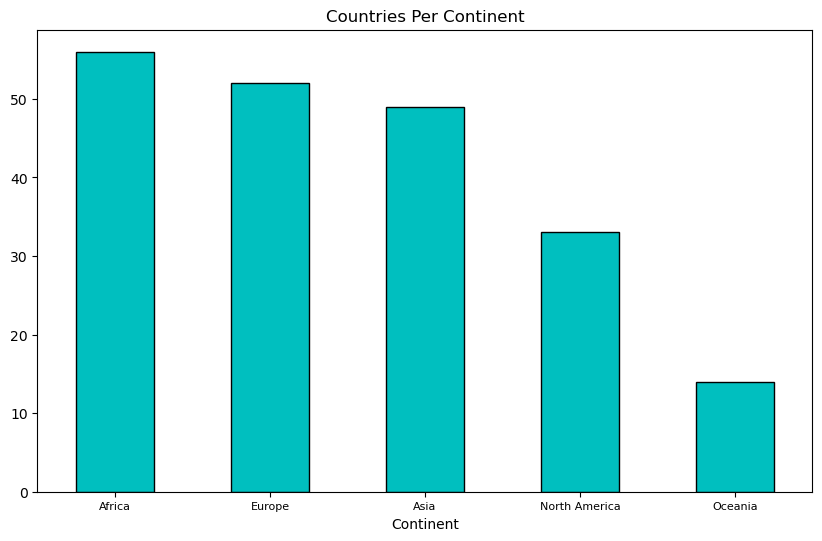

In [328]:
plt.subplots(figsize=(10,6))
continents['Continent'].value_counts().head().plot(kind='bar', color='c', edgecolor='black')
plt.xticks(rotation=0, fontsize=8)
plt.title('Countries Per Continent' );

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [329]:
gdp_2021_continent = gdp_df[gdp_df['year'] == 2021]
gdp_2021.head()

,country,year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


Text(0.5, 1.0, 'GDP Per Capita in 2021')

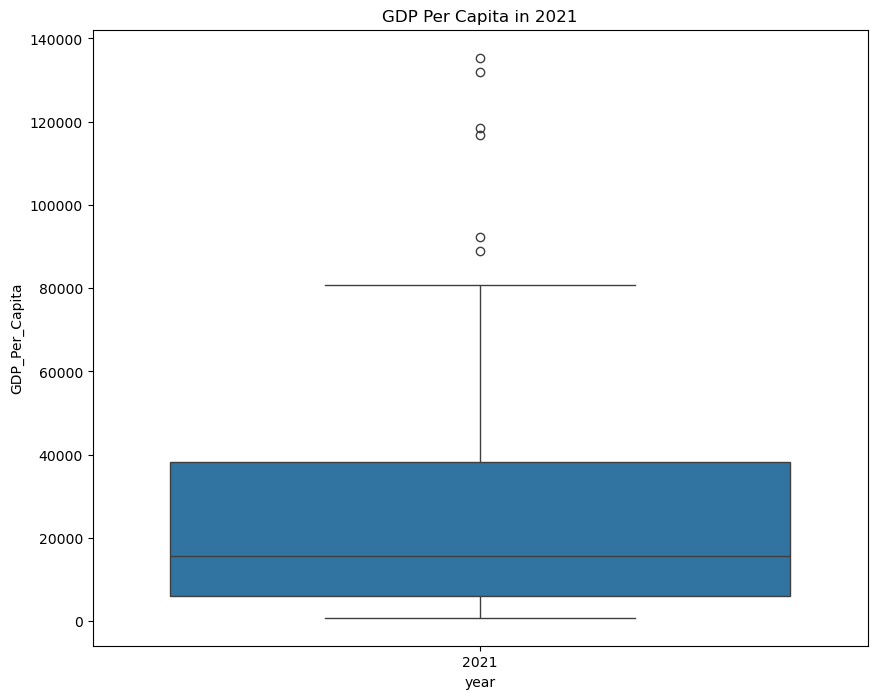

In [330]:
plt.figure(figsize = (10,8))
sns.boxplot(data = gdp_2021_continent.sort_values('GDP_Per_Capita'), x = "year", y = "GDP_Per_Capita");
plt.title("GDP Per Capita in 2021")

21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [331]:
life_expectancy= pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv', skiprows = 4)  
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [332]:
life_expectancy_new= life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
life_expectancy_new.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,66.126000,66.385000,66.744000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,45.765725,46.440745,46.738632,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


In [333]:
melted_life_expectancy = life_expectancy_new.melt(id_vars=["Country Name"])
melted_life_expectancy.head(2)


,Country Name,variable,value
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658


In [334]:
new_melted_life_expectancy = melted_life_expectancy.rename(columns={
    'Country Name': 'Country',
    'variable': 'Year',
    'value': 'Life_Expectancy'
})
new_melted_life_expectancy.head(2)

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658


23. What was the first country with a life expectancy to exceed 80?

In [335]:
first_country_over80 = new_melted_life_expectancy.loc[(new_melted_life_expectancy['Life_Expectancy'] >= 80)].index[0]  

print(f"First Life Expectancy greater than 80: {new_melted_life_expectancy.loc[first_country_over80, "Country"]}")
print(f"Year in which first life expectancy was greater than 80: {new_melted_life_expectancy.loc[first_country_over80, "Year"]}")
print(f"Value at that index: {new_melted_life_expectancy.loc[first_country_over80, 'Life_Expectancy']}")

First Life Expectancy greater than 80: Monaco
Year in which first life expectancy was greater than 80: 1992
Value at that index: 80.065


24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [336]:
melted_life_expectancy['variable'] = pd.to_numeric(melted_life_expectancy['variable'], errors= 'coerce')

In [337]:
gdp_le = pd.merge(gdp_df, melted_life_expectancy, left_on=('country', 'year'), right_on=('Country Name','variable'), how='inner')
#gdp_le.head()
gdp_le.tail()

,country,year,GDP_Per_Capita,Continent,Country,Country Name,variable,value
5851,Zimbabwe,1994,3965.730986,Africa,Zimbabwe,Zimbabwe,1994.0,52.537
5852,Zimbabwe,1993,3634.750494,Africa,Zimbabwe,Zimbabwe,1993.0,53.976
5853,Zimbabwe,1992,3649.891947,Africa,Zimbabwe,Zimbabwe,1992.0,55.602
5854,Zimbabwe,1991,4126.405247,Africa,Zimbabwe,Zimbabwe,1991.0,57.037
5855,Zimbabwe,1990,4013.299059,Africa,Zimbabwe,Zimbabwe,1990.0,58.319


In [338]:
gdp_le_clean = gdp_le.drop(['Country Name', 'Country','variable'], axis=1)
gdp_le_clean.head(2)

,country,year,GDP_Per_Capita,Continent,value
0,Afghanistan,2023,1992.424394,Asia,66.035
1,Afghanistan,2022,1981.710168,Asia,65.617


In [339]:
gdp_le_best = gdp_le_clean.rename(columns={
    'variable': 'Year',
    'value': 'Life_Expectancy'
})
gdp_le_best

,country,year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2023,1992.424394,Asia,66.035
1,Afghanistan,2022,1981.710168,Asia,65.617
2,Afghanistan,2021,2144.166570,Asia,60.417
3,Afghanistan,2020,2769.685745,Asia,61.454
4,Afghanistan,2019,2927.245144,Asia,62.941
...,...,...,...,...,...
5851,Zimbabwe,1994,3965.730986,Africa,52.537
5852,Zimbabwe,1993,3634.750494,Africa,53.976
5853,Zimbabwe,1992,3649.891947,Africa,55.602
5854,Zimbabwe,1991,4126.405247,Africa,57.037


25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [340]:
gdp_le_2021 = gdp_le_best[gdp_le_best['year'] == 2021]
gdp_le_2021.head(2)

,country,year,GDP_Per_Capita,Continent,Life_Expectancy
2,Afghanistan,2021,2144.166570,Asia,60.417
26,Albania,2021,16113.136519,Europe,76.844


In [341]:
gdp_le_2021[gdp_le_2021['Life_Expectancy'] >= 80].count().iloc[0] 

np.int64(33)

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [342]:
gdp_le_2021_sorted= gdp_le_2021.sort_values(by='GDP_Per_Capita', ascending=False)
gdp_le_2021_sorted_3= gdp_le_2021_sorted.head(3)
gdp_le_2021_sorted_3

,country,year,GDP_Per_Capita,Continent,Life_Expectancy
3061,Luxembourg,2021,135379.291201,Europe,82.597561
4673,Singapore,2021,131864.092336,Asia,83.092683
2434,Ireland,2021,118594.746862,Europe,82.253659


In [343]:

# Define the countries we want to filter
countries = ['Luxembourg', 'Singapore', 'Ireland']

# Filter the dataframe to include only these countries
gdp_top_3 = gdp_le_best[gdp_le_best['country'].isin(countries)]

# Select only the columns we need
gdp_top_3 = gdp_top_3[['country', 'year', 'Life_Expectancy']]

# Display the result
gdp_top_3

,country,year,Life_Expectancy
2432,Ireland,2023,82.860976
2433,Ireland,2022,82.509756
2434,Ireland,2021,82.253659
2435,Ireland,2020,82.456098
2436,Ireland,2019,82.702439
...,...,...,...
4700,Singapore,1994,76.197561
4701,Singapore,1993,76.046341
4702,Singapore,1992,75.946341
4703,Singapore,1991,75.646341


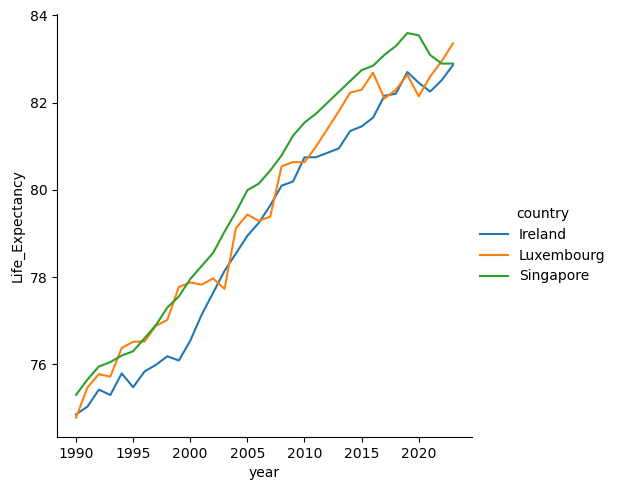

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt  

sns.relplot(
    data=gdp_top_3,
    x="year",
    y="Life_Expectancy",
    hue="country",
    kind="line"
);

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

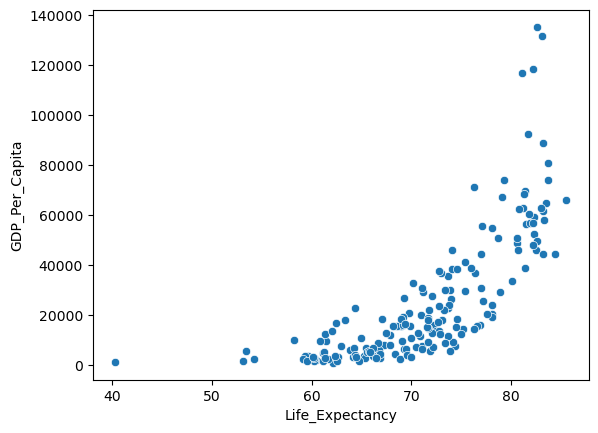

In [345]:
sns.scatterplot(
    data=gdp_le_2021,
    x="Life_Expectancy",
    y="GDP_Per_Capita",
);
#life expectancy over 80 could be reflected by a high gdp per capita

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [346]:
correlation_le_gdp_2021 =  gdp_le_2021['GDP_Per_Capita'].corr(gdp_le_2021['Life_Expectancy'])
correlation_le_gdp_2021

np.float64(0.7527849922684222)

There is a positive linear correlation between the GDP and Life Expectancy because they both increases proportionately

29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [348]:
gdp_le_2021['Log of GDP'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021.head(2)


/var/folders/h8/51mqc9v517x00_mhcb5s7ncw0000gn/T/ipykernel_68123/879109954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['Log of GDP'] = np.log(gdp_le_2021['GDP_Per_Capita'])


,country,year,GDP_Per_Capita,Continent,Life_Expectancy,Log of GDP
2,Afghanistan,2021,2144.166570,Asia,60.417,7.670506
26,Albania,2021,16113.136519,Europe,76.844,9.687390


In [357]:
correlation_le_gdp_log_2021 =  gdp_le_2021['Log of GDP'].corr(gdp_le_2021['Life_Expectancy'])
correlation_le_gdp_log_2021

np.float64(0.8490647859471865)

the calculations were almost identical 

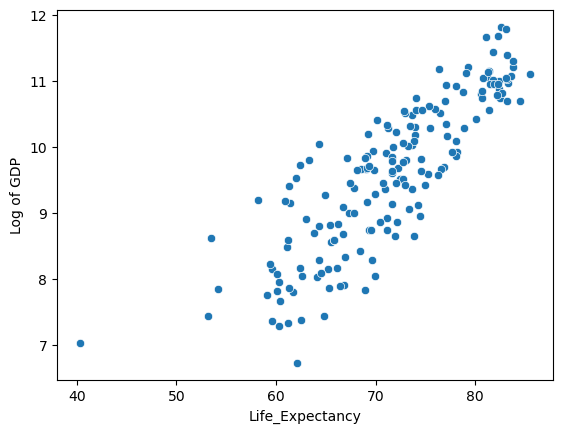

In [364]:
sns.scatterplot(
    data=gdp_le_2021,
    x="Life_Expectancy",
    y="Log of GDP",
);

It seems to be more linear

Bonus: Solo Exploration:

1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find.
2. If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.

1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.